In [17]:
from pathlib import Path
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, TFAutoModelForSeq2SeqLM




# Path to the data

In [2]:
BASE_DIR = Path.cwd()
train_data_dir = BASE_DIR / "msrp/msr_paraphrase_train.txt"


## Reading the file

In [3]:
def readfile(path):
    with path.open(mode="r", encoding="utf-8") as file:
        file_contents = file.read()

    return file_contents

# Preprocessing the data

In [4]:
def preprocess(path):
    data = readfile(path)
    d = data.split("\n")
    val = [i.split("\t") for i in d]
    return val


## Visualizating our data

In [5]:
data = preprocess(train_data_dir)

df = pd.DataFrame(data[1:], columns=data[0])
df = df.dropna()


In [6]:
df.head()

,﻿Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [7]:
df.count()

Quality     4076
#1 ID        4076
#2 ID        4076
#1 String    4076
#2 String    4076
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ﻿Quality   4076 non-null   object
 1   #1 ID      4076 non-null   object
 2   #2 ID      4076 non-null   object
 3   #1 String  4076 non-null   object
 4   #2 String  4076 non-null   object
dtypes: object(5)
memory usage: 191.1+ KB


In [9]:
x = df["#1 String"]
y = df["#2 String"]



In [10]:
plt_list = []
leng = 0
for text in x:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(x)


115.795142296369

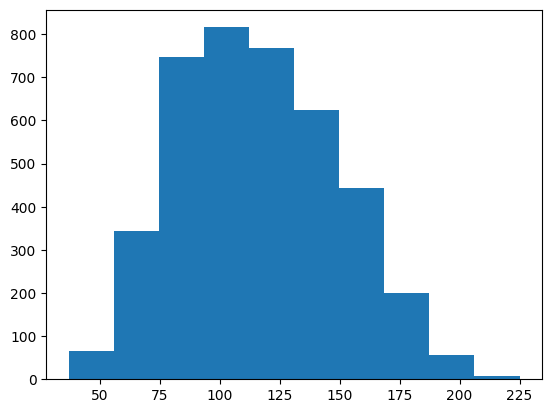

In [11]:
plt.hist(plt_list);

In [12]:
x

0       Amrozi accused his brother, whom he called "th...
1       Yucaipa owned Dominick's before selling the ch...
2       They had published an advertisement on the Int...
3       Around 0335 GMT, Tab shares were up 19 cents, ...
4       The stock rose $2.11, or about 11 percent, to ...
                              ...                        
4071    "At this point, Mr. Brando announced: 'Somebod...
4072    Martin, 58, will be freed today after serving ...
4073    "We have concluded that the outlook for price ...
4074    The notification was first reported Friday by ...
4075    The 30-year bond US30YT=RR rose 22/32 for a yi...
Name: #1 String, Length: 4076, dtype: object

In [13]:
x[1],y[1]

("Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.",
 "Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.")

In [142]:

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = TFAutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

e:\ML\NLP\common\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [39]:
prefix = "Parapharase the text: "

In [33]:
x = [prefix + i for i in x]

In [109]:
x[1]

"Parapharase the text: Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion."

In [34]:
tokenized_data_x = tokenizer(list(x), return_tensors="np", padding = True).input_ids
tokenized_data_y = tokenizer(list(y), return_tensors="np", padding = True).input_ids


In [125]:
tokenized_data_xa = tokenizer(list(x), return_tensors="np", padding= True).input_ids


In [126]:
len(tokenized_data_xa[40])

65

In [113]:
tokenized_data_y[0]

array([12250,  1007,    12,   376,    38,   163,    96,   532,  9051,
        1686,   736,  9860,    23, 11970,   112,  4284,    13, 24067,
        1227,  7279,  1222,   112,  2084,     5,     1,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0])

In [97]:
len(tokenized_data_x[56])

65

In [90]:
len(pre_tok_text[0])

62

In [37]:
model.compile(optimizer= "adam")

In [38]:
model.fit(x = tokenized_data_x, y = tokenized_data_y, epochs=5)

Epoch 1/5
128/128 [==============================] - 1676s 12s/step - loss: 1.4808
Epoch 2/5
128/128 [==============================] - 1254s 10s/step - loss: 0.6668
Epoch 3/5
128/128 [==============================] - 1287s 10s/step - loss: 0.5506
Epoch 4/5
128/128 [==============================] - 1303s 10s/step - loss: 0.4504
Epoch 5/5
128/128 [==============================] - 1303s 10s/step - loss: 0.3684


In [193]:
predict_text = "Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion."

In [194]:
text = [prefix + predict_text]
pre_tok_text = tokenizer(list(text), padding = True, return_tensors="np").input_ids

In [195]:
pre_tok_text

array([[ 4734,  6977, 15447,     8,  1499,    10,  6214,   658,    23,
          102,     9,  4157, 19169,   157,    31,     7,   274,  3014,
            8,  3741,    12, 12165,  1343,    16,  6260,    21,  1514,
        15967,  2108,     5,     1]])

In [196]:
predict= model.generate(pre_tok_text)

In [197]:
val = tokenizer.decode(predict[0])

In [198]:
val

"<pad>Yucaipa owned Dominick's before selling the chain to Safeway in 1998"

In [186]:
len(val)

64